In [11]:
%matplotlib inline

n = 50
m =50


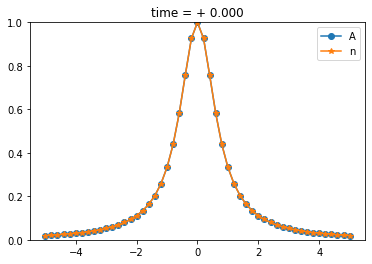

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def u0(x):
    return 1.0 / (1 + 2 * x * x )

def solution(x , t):
    return u0(x - C * t)

def animate (k):
    plt.clf()
    plt.ylim(0 ,1)
    plt.title( f"time = + {(tau * k):0.3f}")
    plt.plot(x, y[k], marker = 'o')
    plt.legend("Numerical")
    plt.plot(x, u[k], marker = '*')
    plt.legend("Analytical")

C = 1.0
T = 2.0
L , R = -5.0 , 5.0

print("n = ", end = "")
n = (int(input()))
print("m =", end = "")
m = (int(input()))
h = (R - L) / n
tau = T / m

x = np.linspace(L, R, n + 1)
t = np.linspace(0.0, T, m + 1)
y = np.zeros((m + 1, n + 1))

d = C * tau / h
y[0] = np.vectorize(u0)(x)
for k in range (m):
    for i in range (1 , n + 1):
        y[k + 1][i] = y[k][i] - d * (y[k][i] - y[k][i - 1])
vsolution = np.vectorize(solution, excluded=['t'])
u = np.zeros((m + 1 , n + 1))
for k in range (m):
    u[k] = vsolution(x , tau * k)

ani = animation.FuncAnimation(plt.figure(0), animate, frames = y.shape[0], interval = 100)
ani.save('transfer.mp4')

plt.show()

n = 50
m = 50


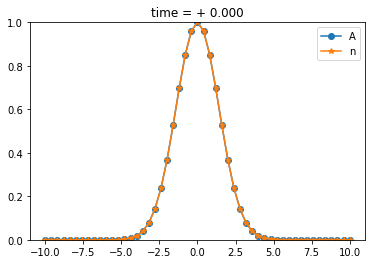

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def u0(x):
    return np.exp(-x*x/4)

def solution(x , t):    
    return 1 / np.sqrt(t + 1) * np.exp(-x * x / (4 * (t + 1)))

def animate (k):
    plt.clf()
    plt.ylim(0 ,1)
    plt.title( f"time = + {(tau * k):0.3f}")
    plt.plot(x, y[k], marker = 'o')
    plt.legend("Numerical")
    plt.plot(x, u[k], marker = '*')
    plt.legend("Analytical")

mu = 1.0
T = 2.0
L , R = -10.0 , 10.0

print("n = ", end = "")
n = int(input())
print("m = ", end = "")
m = int(input())
h = (R - L) / n
tau = T / m

x = np.linspace(L, R, n + 1)
t = np.linspace(0.0, T, m + 1)
y = np.zeros((m + 1, n + 1))

d = mu * tau / (h * h)
y[0] = np.vectorize(u0)(x)
for k in range (m):
    for i in range (1 , n):
        y[k + 1][i] = y[k][i] + d * (y[k][i - 1] - 2 * y[k][i] + y[k][i + 1])
vsolution = np.vectorize(solution, excluded=['t'])
u = np.zeros((m + 1 , n + 1))
for k in range (m):
    u[k] = vsolution(x , tau * k)

ani = animation.FuncAnimation(plt.figure(0), animate, frames = y.shape[0], interval = 100)
ani.save('transfer.mp4')
plt.show()
